In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 25 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 133872 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [2]:
from pandas_datareader import data
import fix_yahoo_finance as yf
yf.pdr_override()

start_date = '1990-1-1' 
end_date = '2017-6-30' 
KIA = data.get_data_yahoo('000270.KS', start_date, end_date)
    
# KIA = web.DataReader('KRX:000270','google',start,end) # 구글용... 동작이 안됨
# KIA = web.DataReader('000270.KS','yahoo',start,end) # 구글용... 동작이 안됨
KIA.head()

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,7404.520020,7665.240234,7300.229980,7665.240234,5803.053711,636300
2000-01-05,7404.520020,7404.520020,7248.089844,7248.089844,5487.245605,686100
2000-01-06,7331.520020,7519.240234,6935.220215,6935.220215,5250.383789,379000
2000-01-07,6987.359863,7143.799805,6778.790039,6778.790039,5131.958008,701400
2000-01-10,6841.359863,7102.080078,6810.069824,7091.649902,5368.811523,1076700


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


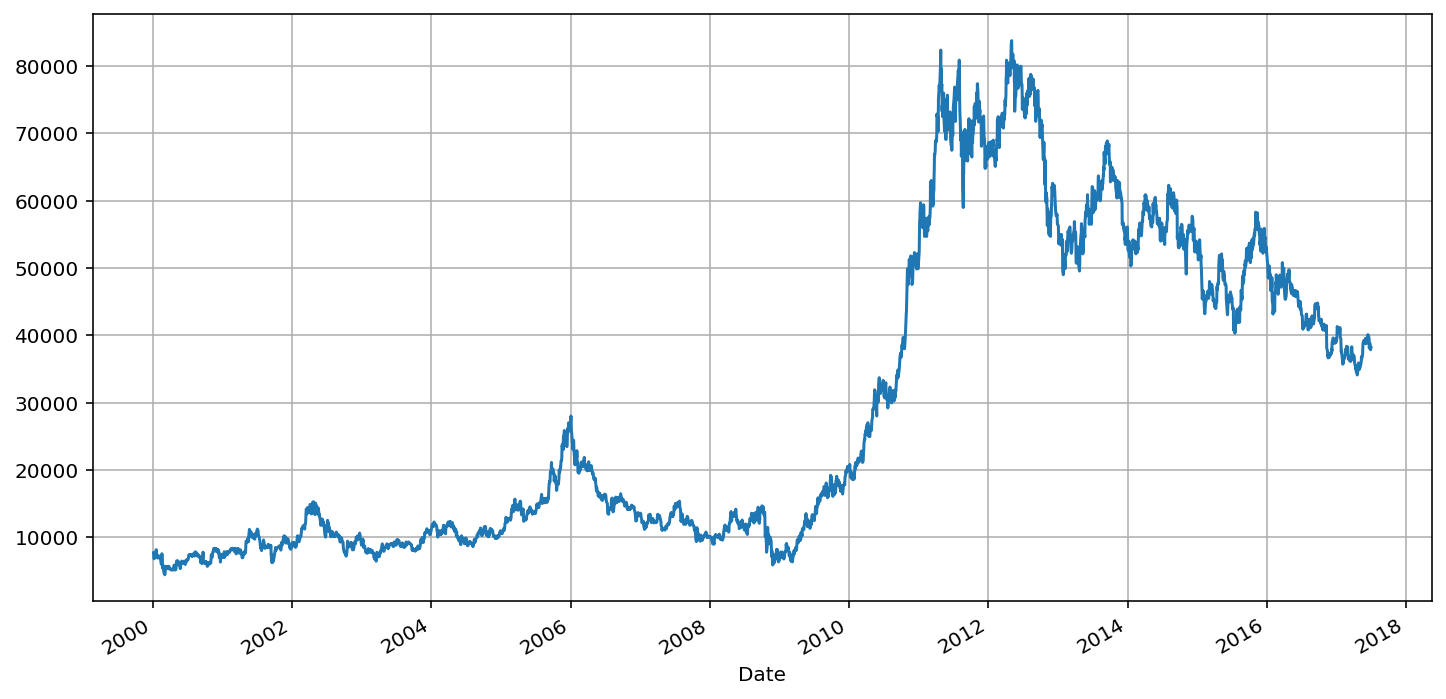

In [3]:
KIA['Close'].plot(figsize=(12,6), grid=True);

In [4]:
KIA_trunc = KIA[:'2016-12-31']
KIA_trunc

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,7404.520020,7665.240234,7300.229980,7665.240234,5803.053711,636300
2000-01-05,7404.520020,7404.520020,7248.089844,7248.089844,5487.245605,686100
2000-01-06,7331.520020,7519.240234,6935.220215,6935.220215,5250.383789,379000
2000-01-07,6987.359863,7143.799805,6778.790039,6778.790039,5131.958008,701400
2000-01-10,6841.359863,7102.080078,6810.069824,7091.649902,5368.811523,1076700
...,...,...,...,...,...,...
2016-12-23,38700.000000,39350.000000,38650.000000,39100.000000,36095.636719,1070783
2016-12-26,39100.000000,39350.000000,38850.000000,39000.000000,36003.320313,465612
2016-12-27,39050.000000,39700.000000,39050.000000,39500.000000,36464.902344,879686


In [6]:
import pandas as pd
df = pd.DataFrame({'ds':KIA_trunc.index, 'y':KIA_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']
df.head()

,ds,y
0,2000-01-04,7665.240234
1,2000-01-05,7248.089844
2,2000-01-06,6935.220215
3,2000-01-07,6778.790039
4,2000-01-10,7091.649902


In [7]:
from fbprophet import Prophet
from datetime import datetime

m = Prophet(daily_seasonality=True)
m.fit(df);

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


In [8]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
4577,2017-12-25
4578,2017-12-26
4579,2017-12-27
4580,2017-12-28
4581,2017-12-29


In [9]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
4577,2017-12-25,35792.934519,28092.343493,45177.120265
4578,2017-12-26,35837.389027,27530.169835,45260.911080
4579,2017-12-27,35806.319877,27785.885894,45024.772960
4580,2017-12-28,35771.338077,28412.397812,44868.790970
4581,2017-12-29,35709.884203,27787.773679,44357.005784


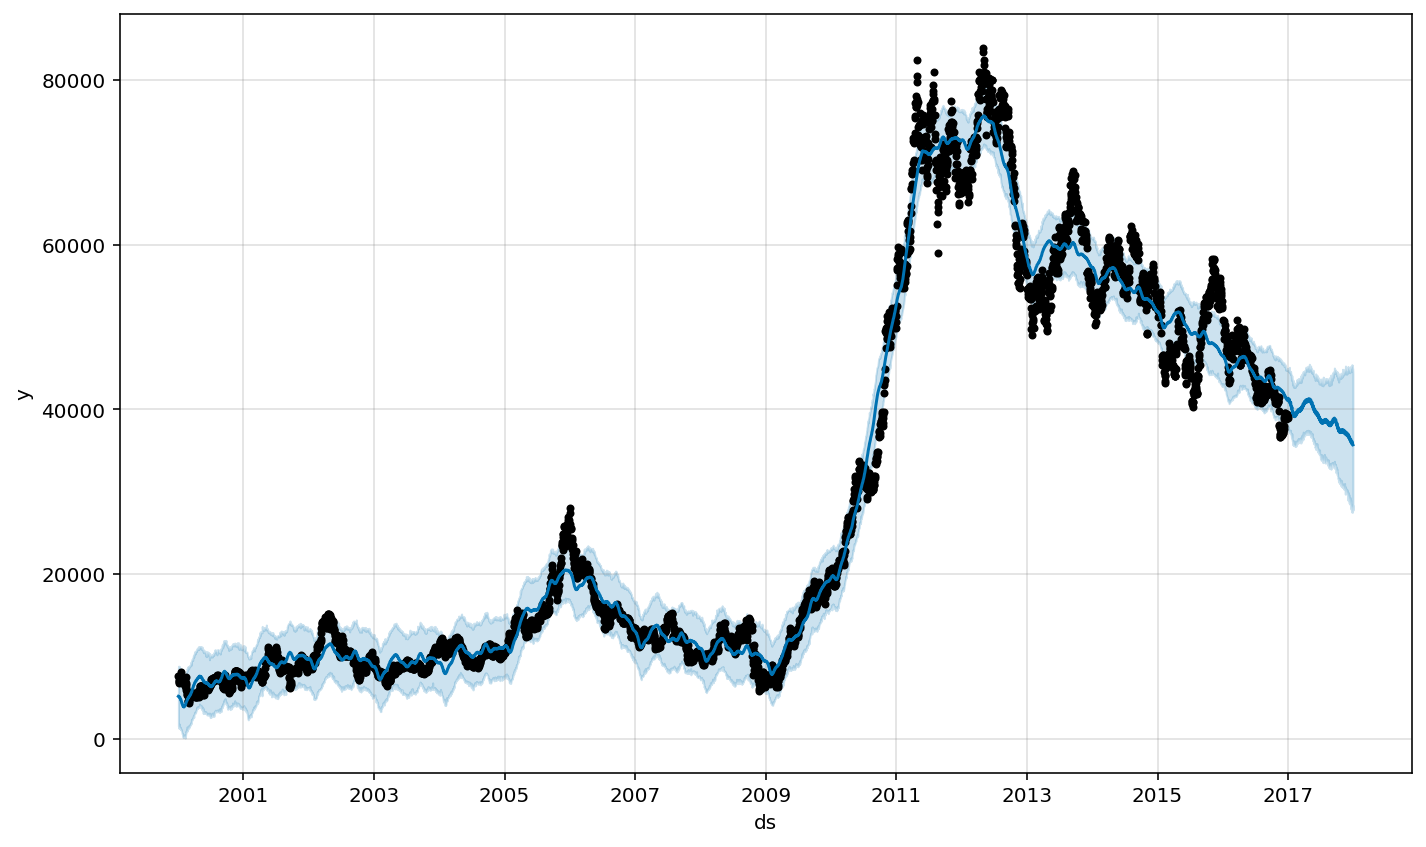

In [10]:
m.plot(forecast);

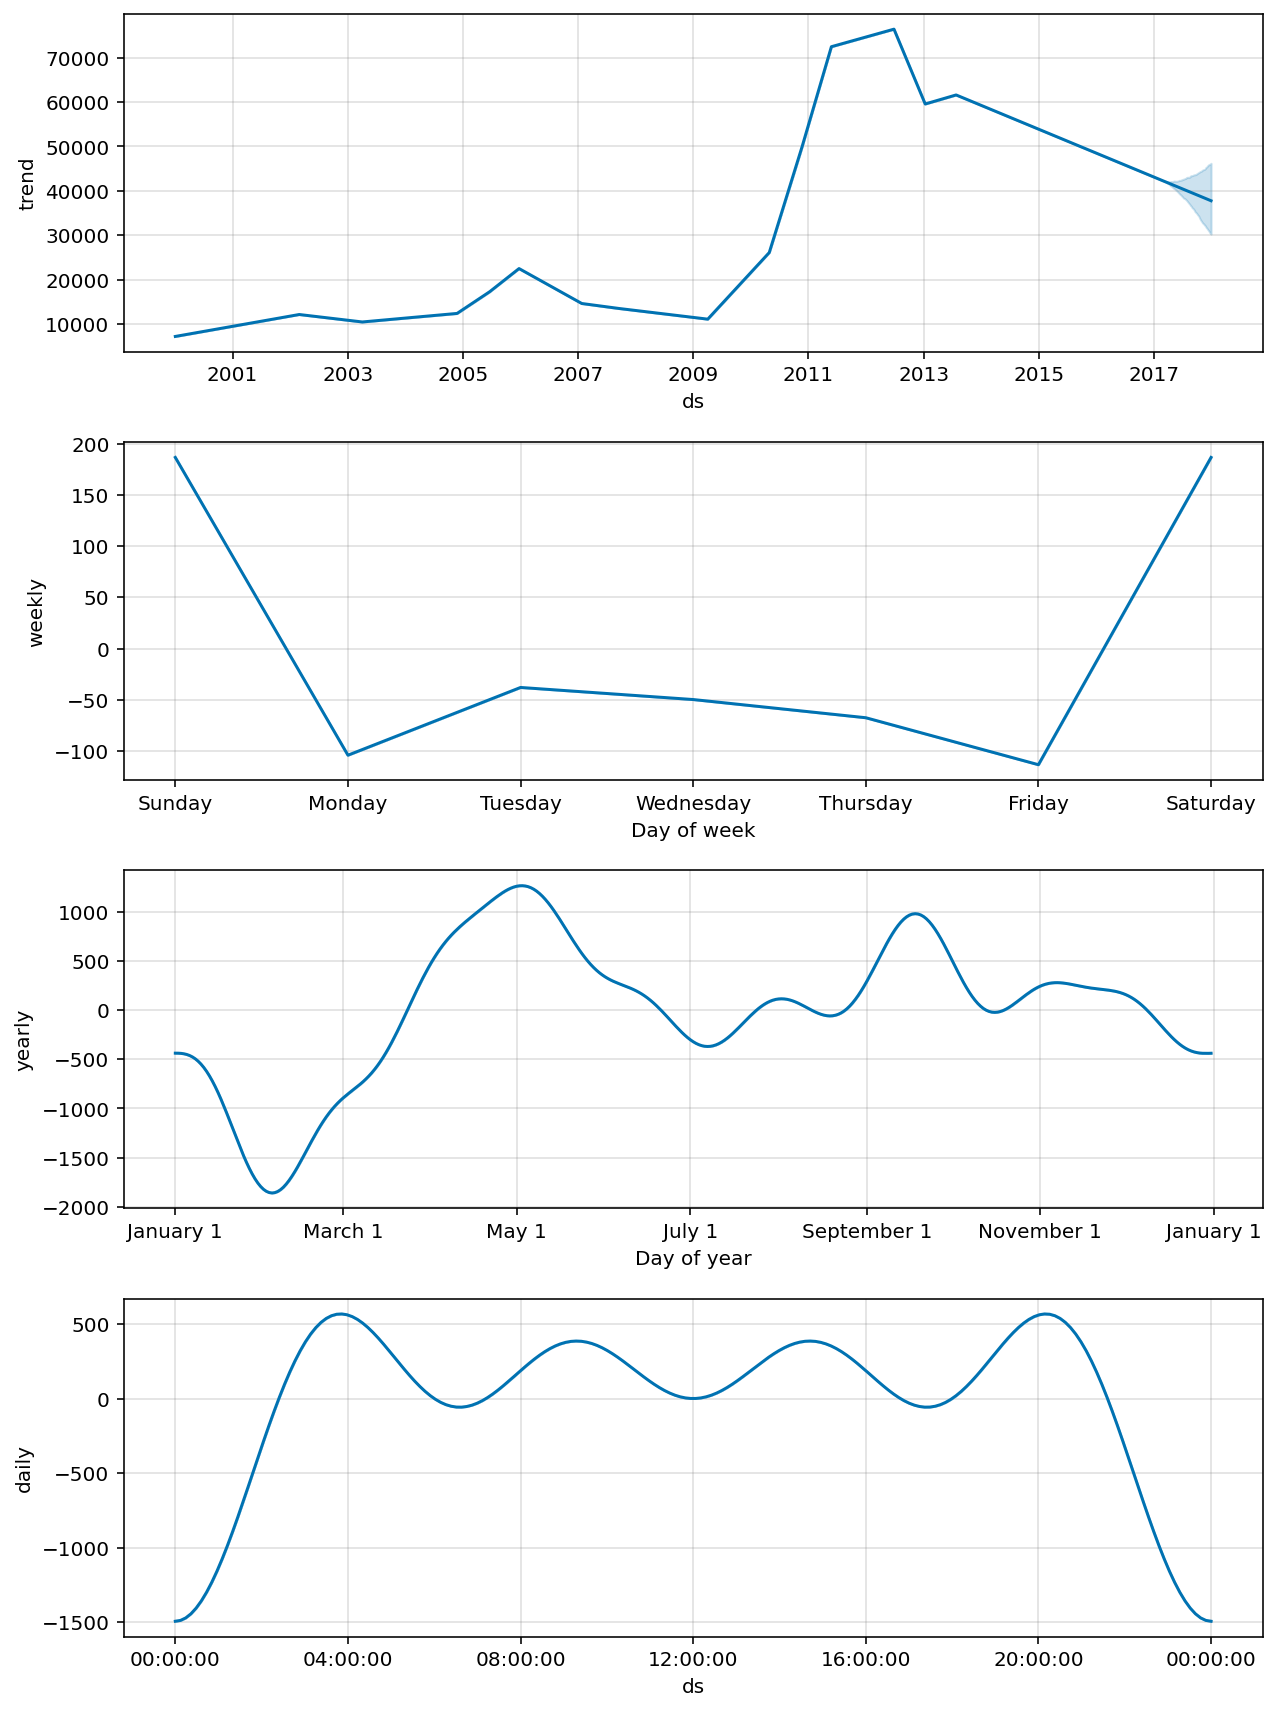

In [11]:
m.plot_components(forecast);

[*********************100%***********************]  1 of 1 downloaded


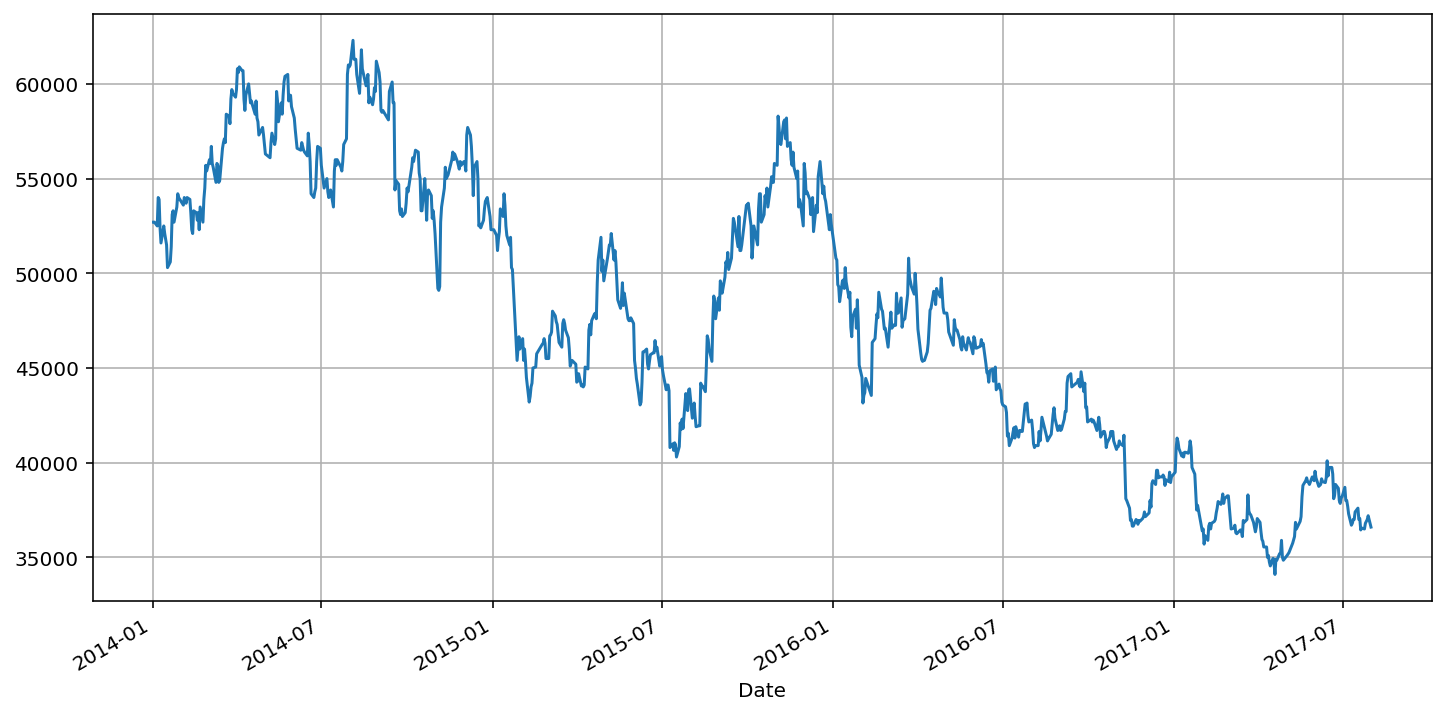

In [12]:
start_date = '2014-1-1' 
end_date = '2017-7-31' 
KIA = data.get_data_yahoo('000270.KS', start_date, end_date)
KIA['Close'].plot(figsize=(12,6), grid=True);

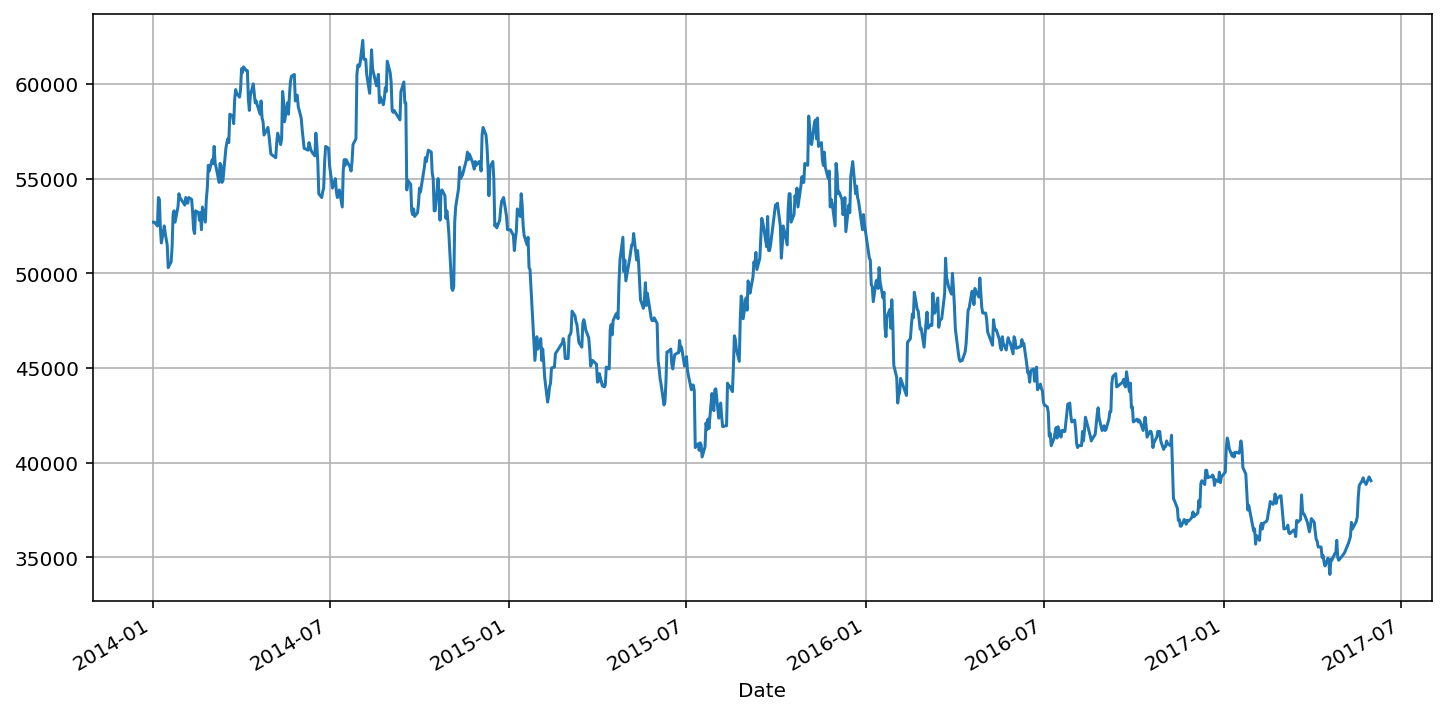

In [13]:
KIA_trunc = KIA[:'2017-05-31']
KIA_trunc['Close'].plot(figsize=(12,6), grid=True);

In [0]:
df = pd.DataFrame({'ds':KIA_trunc.index, 'y':KIA_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']

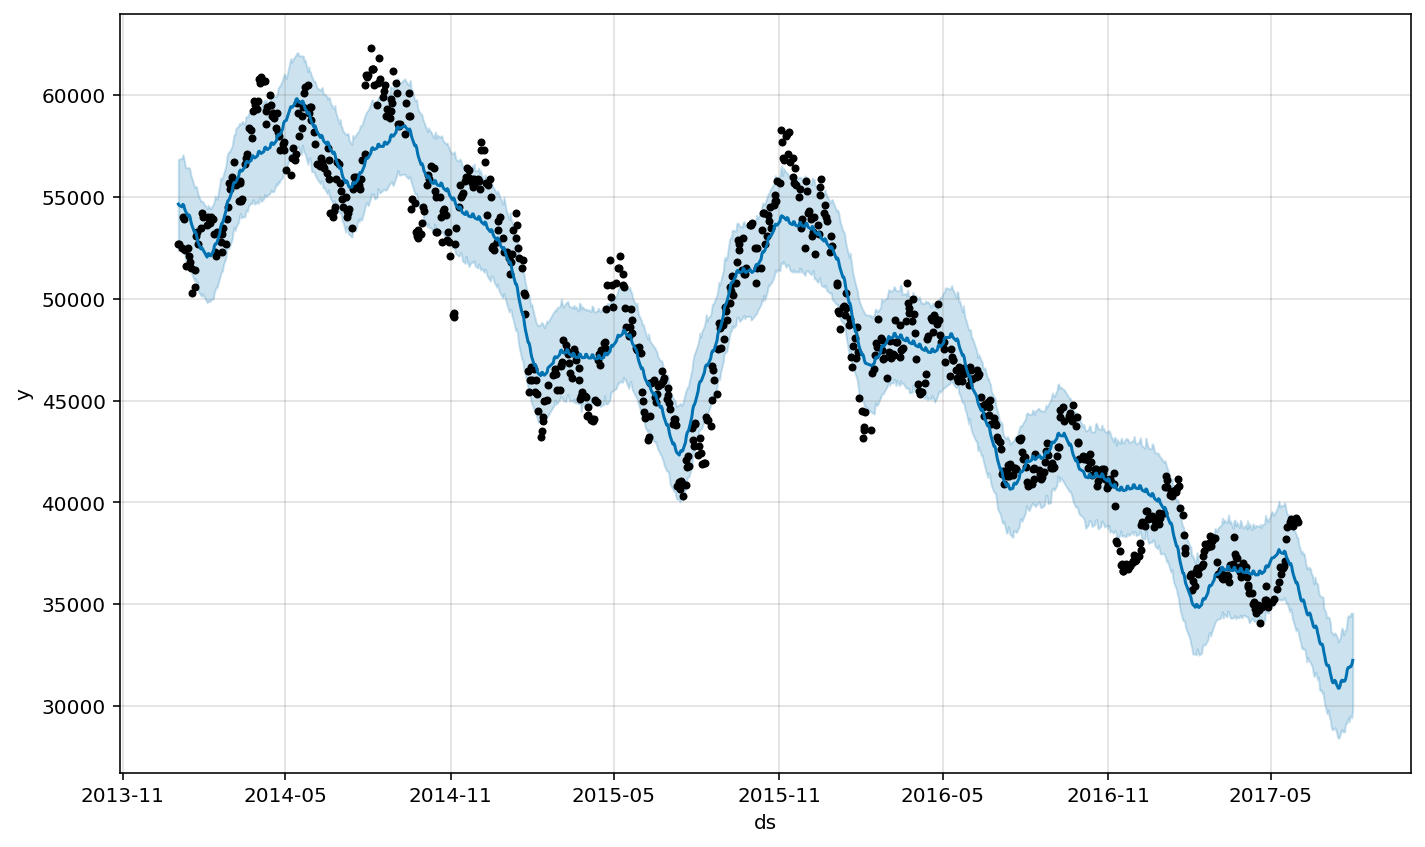

In [15]:
m = Prophet(daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=61)
forecast = m.predict(future)
m.plot(forecast);

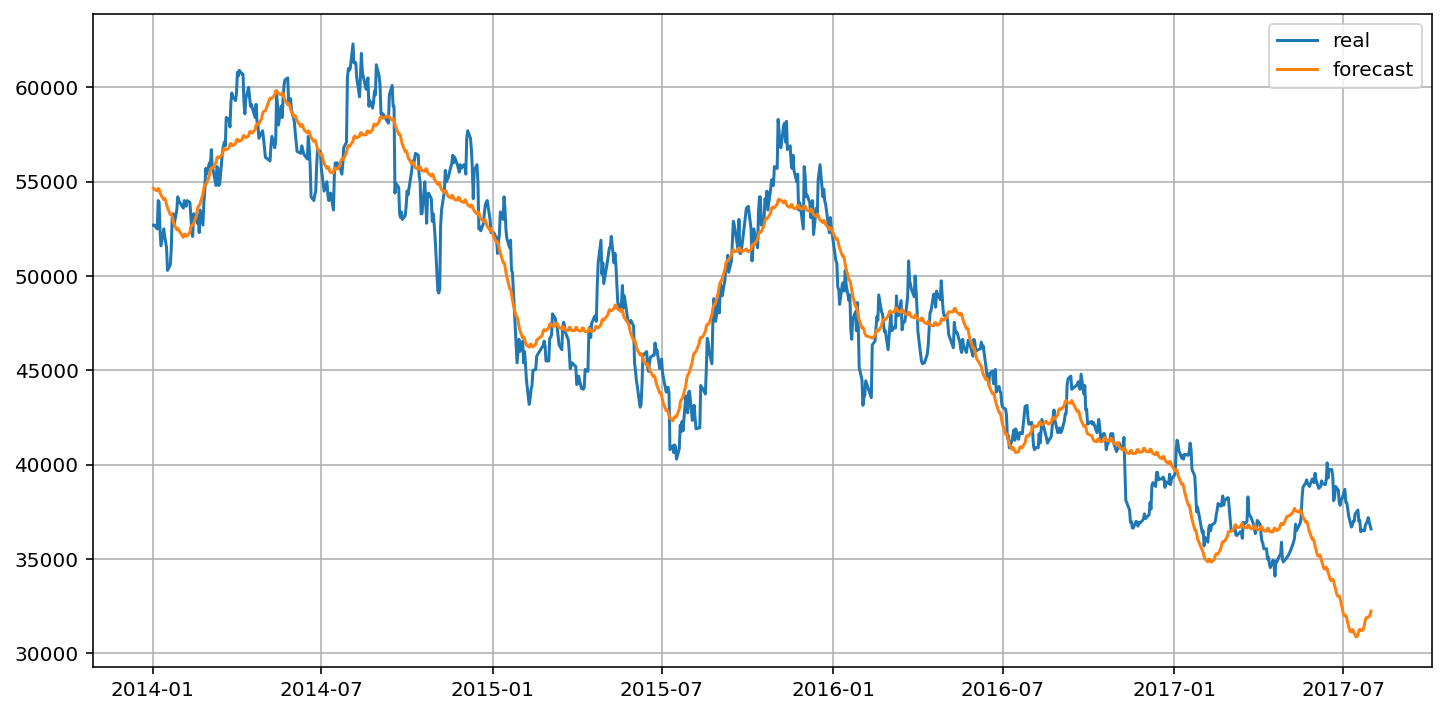

In [16]:
plt.figure(figsize=(12,6))
plt.plot(KIA.index, KIA['Close'], label='real')
plt.plot(forecast['ds'], forecast['yhat'], label='forecast')
plt.grid()
plt.legend()
plt.show()